# Exploratory Data Analysis for HDB Resale Prices Dataset

In this jupyter notebook, we will attempt to use data visualization tools to explore the relationships between features (both pre-defined and self-defined by us) and the corresponding HDB resale prices in Singapore. 

>All exploratory data analysis done in this notebook will be based on the time period: **2014 to 2023**

### 1. Importing Necessary Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
import seaborn as sns

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

%matplotlib inline

### 2. Loading HDB Resale Prices Dataset (2014 to 2023)

In [2]:
hdb_price_df_14_23 = pd.read_csv('hdb-price-with-features-2014to2023.csv').iloc[:, 1:]
hdb_price_df_14_23.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,mall_count_within_1km,mall_list_within_1km,school_shortest_dist,school_shortest_dist_name,good_sch_count_within_1km,good_sch_list_within_1km,good_sch_score,good_sch_score_sap_gep,distance_to_cbd_km,matured
0,2023-03-01,BISHAN,5 ROOM,450,SIN MING AVE,19 TO 21,120.0,Improved,1989,65.833333,...,2,"['Thomson Plaza', 'Thomson V']",0.381927,Ai Tong School,1,['Ai Tong School'],1,1,8.14046,1
1,2022-11-01,BISHAN,5 ROOM,450,SIN MING AVE,01 TO 03,120.0,Improved,1989,66.166667,...,2,"['Thomson Plaza', 'Thomson V']",0.381927,Ai Tong School,1,['Ai Tong School'],1,1,8.14046,1
2,2022-10-01,BISHAN,5 ROOM,450,SIN MING AVE,04 TO 06,125.0,Improved,1989,66.250000,...,2,"['Thomson Plaza', 'Thomson V']",0.381927,Ai Tong School,1,['Ai Tong School'],1,1,8.14046,1
3,2022-09-01,BISHAN,EXECUTIVE,450,SIN MING AVE,22 TO 24,162.0,Maisonette,1989,66.333333,...,2,"['Thomson Plaza', 'Thomson V']",0.381927,Ai Tong School,1,['Ai Tong School'],1,1,8.14046,1
4,2022-09-01,BISHAN,5 ROOM,450,SIN MING AVE,16 TO 18,125.0,Improved,1989,66.333333,...,2,"['Thomson Plaza', 'Thomson V']",0.381927,Ai Tong School,1,['Ai Tong School'],1,1,8.14046,1


In [3]:
# new 'year' feature - just to check correctness of time frame 
hdb_price_df_14_23['year'] = pd.DatetimeIndex(hdb_price_df_14_23['month']).year
hdb_price_df_14_23['year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

In [4]:
# New DataFrame for HDB data for ALL years 2004 to 2023
hdb_price_df_04_13 = pd.read_csv('hdb-price-with-features-2004to2013.csv').iloc[:, 1:]
hdb_prices_df = pd.concat([hdb_price_df_04_13, hdb_price_df_14_23])
print(hdb_price_df_04_13['month'].nunique() + hdb_price_df_14_23['month'].nunique() == hdb_prices_df['month'].nunique())

True


## Adjustment of HDB Resale Prices for Inflation (using CPI)

In [5]:
# Read CPI data
cpi = pd.read_csv('monthly cpi.csv')
cpi = cpi.set_index('Data Series')
cpi_data = pd.DataFrame(cpi.columns, columns=['month'])
cpi_data['CPI'] = pd.to_numeric(np.array(cpi.loc['All Items']))
cpi_data = cpi_data.iloc[1: , :]
cpi_data['month'] = pd.to_datetime(cpi_data['month'])

# adjust prices for inflation using CPI
hdb_price_df_14_23['month'] = pd.to_datetime(hdb_price_df_14_23['month'])
hdb_price_df_14_23 = pd.merge(hdb_price_df_14_23, cpi_data, how = 'left')
hdb_price_df_14_23['adjusted_price'] = (hdb_price_df_14_23['resale_price'] / hdb_price_df_14_23['CPI']) * 100

hdb_price_df_14_23.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,school_shortest_dist_name,good_sch_count_within_1km,good_sch_list_within_1km,good_sch_score,good_sch_score_sap_gep,distance_to_cbd_km,matured,year,CPI,adjusted_price
0,2023-03-01,BISHAN,5 ROOM,450,SIN MING AVE,19 TO 21,120.0,Improved,1989,65.833333,...,Ai Tong School,1,['Ai Tong School'],1,1,8.14046,1,2023,NaN,NaN
1,2022-11-01,BISHAN,5 ROOM,450,SIN MING AVE,01 TO 03,120.0,Improved,1989,66.166667,...,Ai Tong School,1,['Ai Tong School'],1,1,8.14046,1,2022,110.959,6.849377e+05
2,2022-10-01,BISHAN,5 ROOM,450,SIN MING AVE,04 TO 06,125.0,Improved,1989,66.250000,...,Ai Tong School,1,['Ai Tong School'],1,1,8.14046,1,2022,109.893,7.534602e+05
3,2022-09-01,BISHAN,EXECUTIVE,450,SIN MING AVE,22 TO 24,162.0,Maisonette,1989,66.333333,...,Ai Tong School,1,['Ai Tong School'],1,1,8.14046,1,2022,110.339,1.101152e+06
4,2022-09-01,BISHAN,5 ROOM,450,SIN MING AVE,16 TO 18,125.0,Improved,1989,66.333333,...,Ai Tong School,1,['Ai Tong School'],1,1,8.14046,1,2022,110.339,7.866665e+05


In [6]:
hdb_price_df_14_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200009 entries, 0 to 200008
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   month                      200009 non-null  datetime64[ns]
 1   town                       200009 non-null  object        
 2   flat_type                  200009 non-null  object        
 3   block                      200009 non-null  object        
 4   street_name                200009 non-null  object        
 5   storey_range               200009 non-null  object        
 6   floor_area_sqm             200009 non-null  float64       
 7   flat_model                 200009 non-null  object        
 8   lease_commence_date        200009 non-null  int64         
 9   remaining_lease            200009 non-null  float64       
 10  resale_price               200009 non-null  float64       
 11  address                    200009 non-null  object  

In [7]:
# column names
hdb_price_df_14_23.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'address', 'latitude', 'longitude',
       'shortest_dist_mrt_name', 'shortest_dist_mrt', 'mrt_count_within_1km',
       'mrt_list_within_1km', 'shortest_dist_mall_name', 'shortest_dist_mall',
       'mall_count_within_1km', 'mall_list_within_1km', 'school_shortest_dist',
       'school_shortest_dist_name', 'good_sch_count_within_1km',
       'good_sch_list_within_1km', 'good_sch_score', 'good_sch_score_sap_gep',
       'distance_to_cbd_km', 'matured', 'year', 'CPI', 'adjusted_price'],
      dtype='object')

## By Flat Type

In [8]:
print('Unique Flat Types from 2014 to 2023:\n', hdb_price_df_14_23['flat_type'].unique())

Unique Flat Types from 2014 to 2023:
 ['5 ROOM' 'EXECUTIVE' '3 ROOM' '4 ROOM' '2 ROOM' '1 ROOM'
 'MULTI-GENERATION']


#### Distribution of Flat Types

In [13]:
flat_count_14_23 = hdb_price_df_14_23.groupby(['flat_type']).size().reset_index()
flat_count_14_23.rename(columns={0: 'count'}, inplace=True)
flat_count_14_23['flat_type_proportion'] = (flat_count_14_23['count']/flat_count_14_23['count'].sum())*100
flat_count_14_23['flat_type_proportion'] = flat_count_14_23['flat_type_proportion'].round(1)
flat_count_14_23

,flat_type,count,flat_type_proportion
0,1 ROOM,90,0.0
1,2 ROOM,2815,1.4
2,3 ROOM,49448,24.7
3,4 ROOM,82859,41.4
4,5 ROOM,49399,24.7
5,EXECUTIVE,15318,7.7
6,MULTI-GENERATION,80,0.0


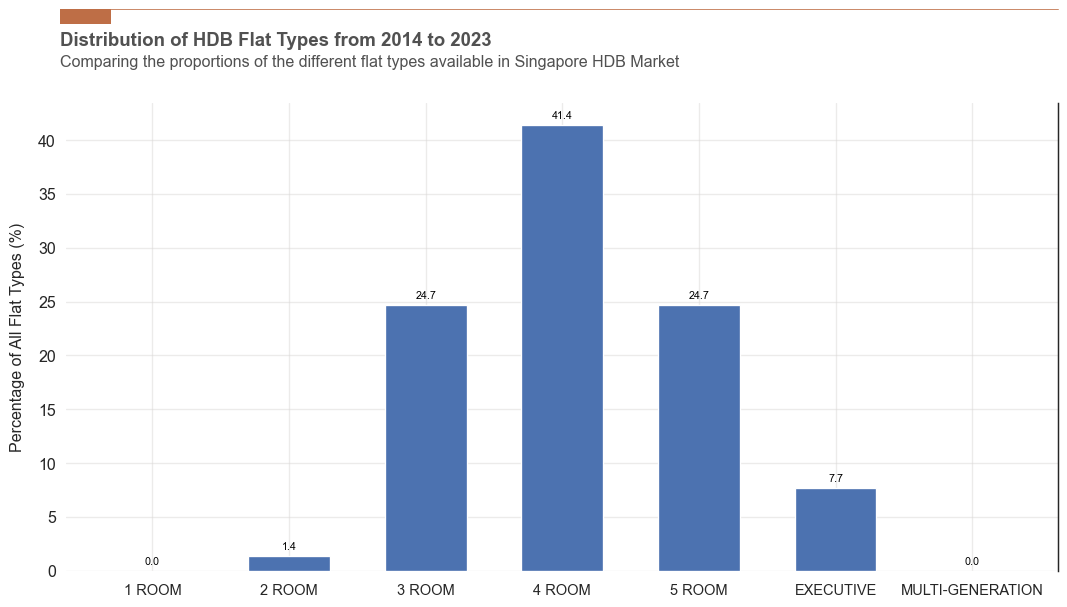

In [15]:
fig, ax = plt.subplots(figsize=(13.33, 7.5), dpi=96)

# Plot bars
bar1 = ax.bar(flat_count_14_23['flat_type'], flat_count_14_23['flat_type_proportion'], width=0.6)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Label x-axis and x ticks
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
# ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
# labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# ax.set_xticks(delay_by_month['Month'], labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Percentage of All Flat Types (%)', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.1f}' for e in flat_count_14_23['flat_type_proportion']], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#BE6E46', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#BE6E46', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s="Distribution of HDB Flat Types from 2014 to 2023", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=.90, s="Comparing the proportions of the different flat types available in Singapore HDB Market", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

For both time blocks (2004 to 2013, and 2014 to 2023):
 proportionately very few 1 room, 2 rooms and multi-generation flat types. They will be removed for looking at flat types.


### keep only the following flat types:
- 3 Room
- 4 Room
- 5 Room
- Executive

In [ ]:
print('Unique flat types before removing:', hdb_price_df_04_13['flat_type'].unique(),'\n')
keep_flat_type = ['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']
hdb_price_df_04_13 = hdb_price_df_04_13[hdb_price_df_04_13['flat_type'].isin(keep_flat_type)]
print('Unique flat types after removing 1 rooms, 2 rooms and multi-generation flat types:',hdb_price_df_04_13['flat_type'].unique())

# do the same for 2014 to 2023
hdb_price_df_14_23 = hdb_price_df_14_23[hdb_price_df_14_23['flat_type'].isin(keep_flat_type)]

Unique flat types before removing: ['5 ROOM' 'EXECUTIVE' '3 ROOM' '4 ROOM' '2 ROOM' '1 ROOM'
 'MULTI-GENERATION'] 

Unique flat types after removing 1 rooms, 2 rooms and multi-generation flat types: ['5 ROOM' 'EXECUTIVE' '3 ROOM' '4 ROOM']


In [ ]:
hdb_price_df_04_13[['resale_price', 'adjusted_price']]

,resale_price,adjusted_price
0,650000.0,677669.234859
1,650000.0,677669.234859
2,570000.0,595499.279132
3,640000.0,687322.128551
4,605000.0,666490.404741
...,...,...
263647,170000.0,221761.306565
263648,168000.0,220625.894651
263649,217000.0,285334.841093
263650,170000.0,221894.456554


#### Ridgeline Plot: Distribution of Resale Prices of Flat Types by Year

In [ ]:
# create new feature flat_type_year
def get_year(x):
    return str(x)[:4]

hdb_price_df_04_13['flat_type_year'] = hdb_price_df_04_13['flat_type'] + ' - ' + hdb_price_df_04_13['month'].apply(lambda x: str(x)[:4])
hdb_price_df_14_23['flat_type_year'] = hdb_price_df_14_23['flat_type'] + ' - ' + hdb_price_df_14_23['month'].apply(lambda x: str(x)[:4])
hdb_price_df_04_13.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,good_sch_count_within_1km,good_sch_list_within_1km,good_sch_score,good_sch_score_sap_gep,distance_to_cbd_km,matured,CPI,adjusted_price,year,flat_type_year
0,2012-05-01,BISHAN,5 ROOM,450,SIN MING AVE,11 TO 15,125.0,Improved,1989,76.0,...,1,['Ai Tong School'],1,1,8.14046,1,95.917,677669.234859,2012,5 ROOM - 2012
1,2012-05-01,BISHAN,5 ROOM,450,SIN MING AVE,16 TO 20,120.0,Improved,1989,76.0,...,1,['Ai Tong School'],1,1,8.14046,1,95.917,677669.234859,2012,5 ROOM - 2012
2,2012-04-01,BISHAN,5 ROOM,450,SIN MING AVE,01 TO 05,120.0,Improved,1989,76.0,...,1,['Ai Tong School'],1,1,8.14046,1,95.718,595499.279132,2012,5 ROOM - 2012
3,2011-08-01,BISHAN,5 ROOM,450,SIN MING AVE,16 TO 18,125.0,Improved,1989,77.0,...,1,['Ai Tong School'],1,1,8.14046,1,93.115,687322.128551,2011,5 ROOM - 2011
4,2011-04-01,BISHAN,5 ROOM,450,SIN MING AVE,19 TO 21,120.0,Improved,1989,77.0,...,1,['Ai Tong School'],1,1,8.14046,1,90.774,666490.404741,2011,5 ROOM - 2011


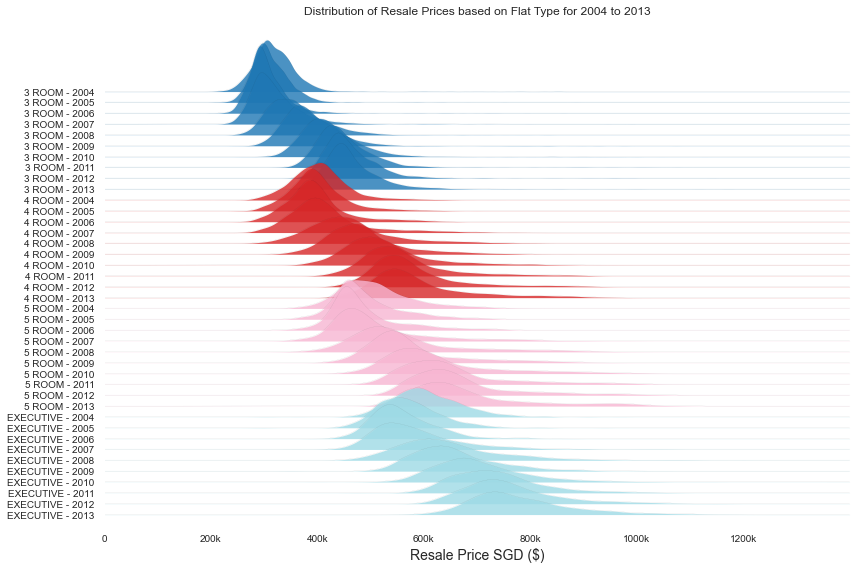

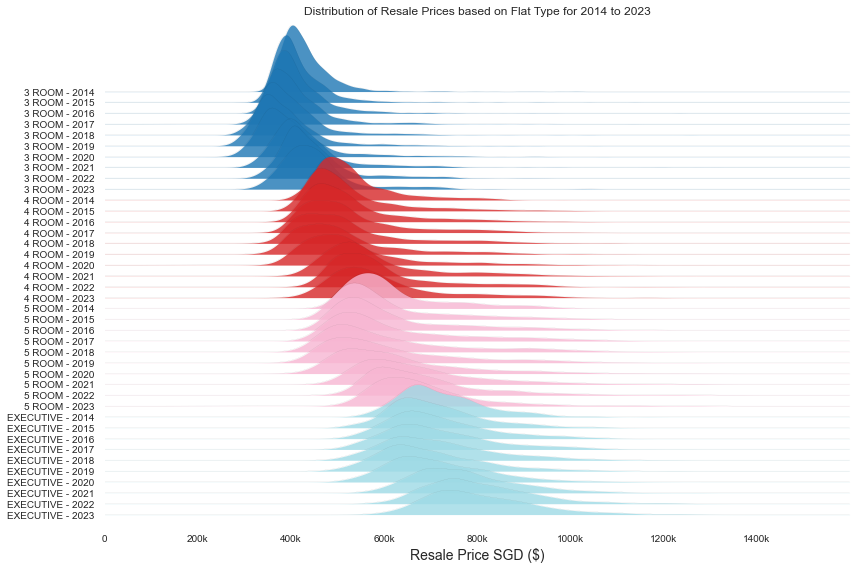

In [ ]:
# visualize using joypy library
import joypy


# time block: 2004 to 2013
fig, axes = joypy.joyplot(hdb_price_df_04_13,
                            by='flat_type_year',
                            column='adjusted_price',
                            figsize=(12,8),
                            title='Distribution of Resale Prices based on Flat Type for 2004 to 2013',
                            linewidth=0.05,
                            overlap=1.5,
                            alpha=0.8,
                            colormap=plt.cm.get_cmap('tab20',4))

axes[-1].set_xlim([0, 1400000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k']) 
plt.xlabel('Resale Price SGD ($)', fontsize=14)

# time block: 2014 to 2023
fig, axes = joypy.joyplot(hdb_price_df_14_23,
                            by='flat_type_year',
                            column='adjusted_price',
                            figsize=(12,8),
                            title='Distribution of Resale Prices based on Flat Type for 2014 to 2023',
                            linewidth=0.05,
                            overlap=1.5,
                            alpha=0.8,
                            colormap=plt.cm.get_cmap('tab20',4))

axes[-1].set_xlim([0, 1600000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k', '1400k']) 
plt.xlabel('Resale Price SGD ($)', fontsize=14)
plt.style.use('fivethirtyeight')
plt.show()

2 observations from the above ridgeline plot:
1. Consistent pattern that HDB flats with more rooms tend to fetch higher resale prices, unsurprising.

2. Looking at how prices vary for the same number of rooms, from 2004 to 2013, HDB resale prices generally increase over the years for the same flat type. 
However, from 2014 to 2023, distribution of prices remain similar over the years.


## By Town bar chart

### Time Block: 2014 to 2023
similar codes as 2004 to 2013

In [11]:
# all room types
hdb_price_df_14_23['year'] = pd.DatetimeIndex(hdb_price_df_14_23['month']).year # extract out year
town_prices_14_23 = hdb_price_df_14_23.groupby(['town'], as_index=False).agg({'adjusted_price': 'median'}).sort_values('adjusted_price', ascending=True).reset_index(drop=True)
town_prices_14_23['adjusted_price'] = round(town_prices_14_23['adjusted_price']/1000)
town_prices_14_23['color'] = town_prices_14_23['color'] = ['#f8766d','#f8766d'] + ['#3c78d8']*(len(town_prices_14_23)-3) + ['#00ba38']

# 4-room
town_prices_14_23_4room = hdb_price_df_14_23[(hdb_price_df_14_23['flat_type'].isin(['4 ROOM']))].groupby(['town'], as_index=False).agg({'adjusted_price': 'median'}).sort_values('adjusted_price', ascending=True).reset_index(drop=True)
town_prices_14_23_4room['adjusted_price'] = round(town_prices_14_23_4room['adjusted_price']/1000)
town_prices_14_23_4room['color'] = town_prices_14_23_4room['color'] = ['#f8766d','#f8766d'] + ['#3c78d8']*(len(town_prices_14_23_4room)-3) + ['#00ba38']

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_1341/3204745816.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()])
/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_1341/3204745816.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()])


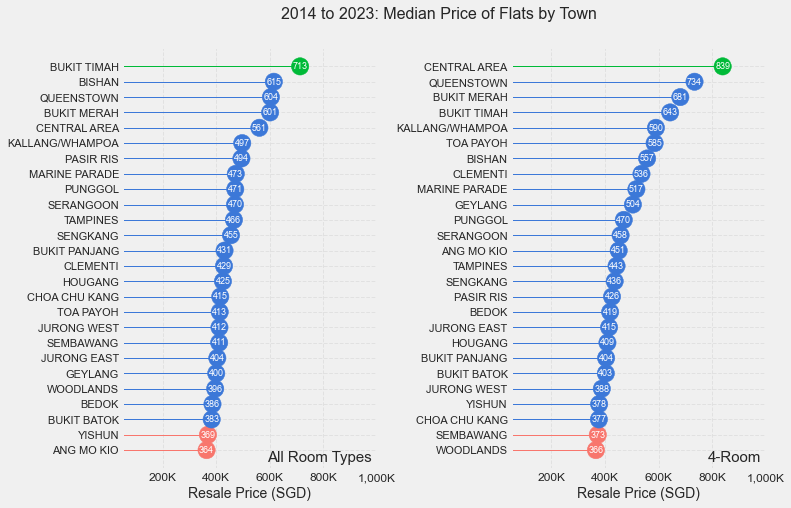

In [ ]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

lowest_median_price, highest_median_price = town_prices_14_23['adjusted_price'].min(), town_prices_14_23['adjusted_price'].max()
colors=['#e3dfda']*len(town_prices_14_23)
# set to lowest and highest prices to red and green respectively
for index, row in town_prices_14_23.iterrows():
    if row['adjusted_price'] == lowest_median_price:
        colors[index] = '#de425b'
    if row['adjusted_price'] == highest_median_price:
        colors[index] = '#488f31'

# Plot bars
bar1 = ax.barh(town_prices_14_23['town'], town_prices_14_23['adjusted_price'], color=colors)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Label x-axis and x ticks
ax.set_xlabel("Median Resale Prices (SGD'000)", fontsize=12, labelpad=10) 
#ax.xaxis.set_label_position("bottom")
#ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
# labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# ax.set_xticks(delay_by_month['Month'], labels) # Map integers numbers from the series to labels list

# Reformat y-axis
#ax.set_ylabel('Town', fontsize=12, labelpad=10)
#ax.yaxis.set_label_position("left")
# ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in town_prices_14_23['adjusted_price']], padding=3, color='black', fontsize=10) 

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#BE6E46', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#BE6E46', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="Median HDB Resale Prices by Town from 2004 to 2013", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Comparing the prices of HDB across different towns for all room types", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(town_prices_14_23['adjusted_price'].min(), town_prices_04_13['adjusted_price'].max()) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(town_prices_14_23['adjusted_price'], town_prices_14_23['town'], color=cmap(norm(town_prices_04_13['adjusted_price'])), width=0.6, zorder=2)
# Set a white background

plt.show()

### 2004 vs 2023 (Now): Percentage Change of Resale Prices by Town 

In [ ]:
# all room types
town_prices_04_23 = hdb_prices_df[hdb_prices_df['year'].isin([2004,2023])].groupby(['town','year'], as_index=False).agg({'adjusted_price': 'median'})
town_prices_04_23['change'] = town_prices_04_23.groupby('town')['adjusted_price'].apply(lambda x: x.pct_change()*100) # calculate percentage change between 2004 and 2023
town_prices_04_23 = town_prices_04_23[town_prices_04_23['change'].notnull()] 
town_prices_04_23 = town_prices_04_23.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
town_prices_04_23['color'] = town_prices_04_23['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

# 4 room
town_prices_04_23_4room = hdb_prices_df[(hdb_prices_df['flat_type'].isin(['4 ROOM']) & hdb_prices_df['year'].isin([2004,2023]))].groupby(['town','year'], as_index=False).agg({'adjusted_price': 'median'})
town_prices_04_23_4room
town_prices_04_23_4room['change'] = town_prices_04_23_4room.groupby('town')['adjusted_price'].apply(lambda x: x.pct_change()*100)
town_prices_04_23_4room = town_prices_04_23_4room[town_prices_04_23_4room.change.notnull()]
town_prices_04_23_4room = town_prices_04_23_4room.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
town_prices_04_23_4room['color'] = town_prices_04_23_4room['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')


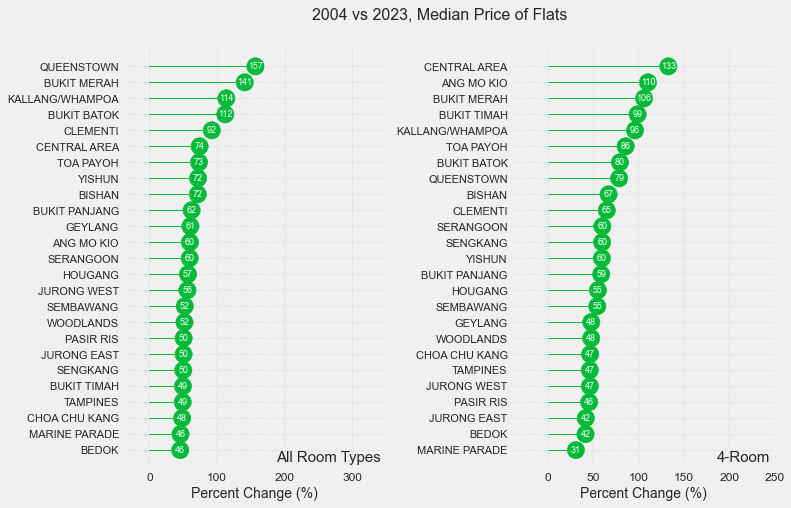

In [ ]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(121)
loll_plot(town_prices_04_23, 'change', 'town', 'All Room Types', 'Percent Change (%)', [-40,350])

ax2 = plt.subplot(122)
loll_plot(town_prices_04_23_4room, 'change', 'town', '4-Room', 'Percent Change (%)', [-40,250])

fig.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.suptitle('2004 vs 2023, Median Price of Flats', fontsize=16)
plt.show()

It seems like every town's resale price has increased by at least double; estates like queenstown increased in resale prices by more than 300% which is too good to true. Upon further analysis, this is not accurate as 'adjusted_price' did not account for inflation over the past 20 years. Hence we cannot make any conclusions based on the above chart.

### Past Two Years (2021 and 2022/2023?): Percentage Change of Resale Prices by Town
should we do 2022 vs 2023? 2023 only have data till march tho


In [ ]:
# all room types
town_prices_21_22 = hdb_prices_df[hdb_prices_df['year'].isin([2021,2022])].groupby(['town','year'], as_index=False).agg({'adjusted_price': 'median'})
town_prices_21_22['change'] = town_prices_21_22.groupby('town')['adjusted_price'].apply(lambda x: x.pct_change()*100) # calculate percentage change between 2004 and 2023
town_prices_21_22 = town_prices_21_22[town_prices_21_22['change'].notnull()] 
town_prices_21_22 = town_prices_21_22.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
town_prices_21_22['color'] = town_prices_21_22['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

# 4 room
town_prices_21_22_4room = hdb_prices_df[(hdb_prices_df['flat_type'].isin(['4 ROOM']) & hdb_prices_df['year'].isin([2021,2022]))].groupby(['town','year'], as_index=False).agg({'adjusted_price': 'median'})
town_prices_21_22_4room['change'] = town_prices_21_22_4room.groupby('town')['adjusted_price'].apply(lambda x: x.pct_change()*100)
town_prices_21_22_4room = town_prices_21_22_4room[town_prices_21_22_4room.change.notnull()]
town_prices_21_22_4room = town_prices_21_22_4room.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
town_prices_21_22_4room['color'] = town_prices_21_22_4room['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

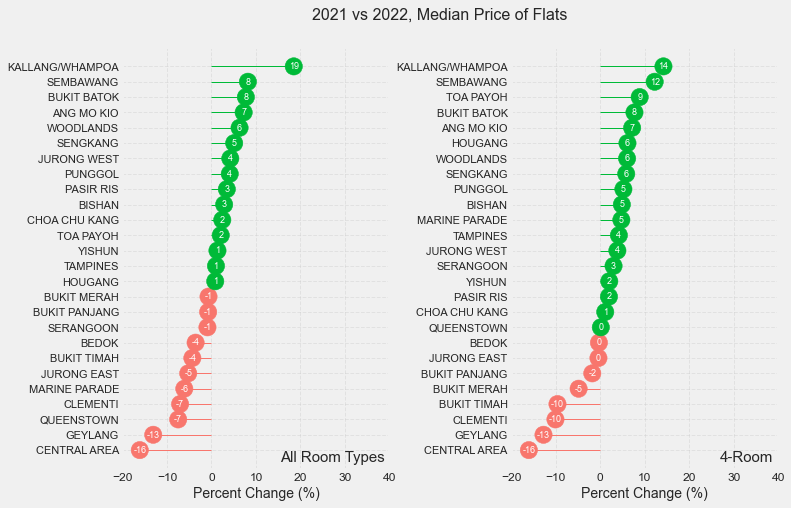

In [ ]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(121)
loll_plot(town_prices_21_22, 'change', 'town', 'All Room Types', 'Percent Change (%)', [-20,40])

ax2 = plt.subplot(122)
loll_plot(town_prices_21_22_4room, 'change', 'town', '4-Room', 'Percent Change (%)', [-20,40])

fig.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.suptitle('2021 vs 2022, Median Price of Flats', fontsize=16)
plt.show()

The changes are not very large from 2021 to 2022. Prices have dropped the most (16%) in Central Area for both all room types and 4 rooms compared to the other towns. 
On the other hand, prices in Kallang/Whampoa have increased the most for both all room types as well as 4-room. 

Could it be because these areas have older HDB meaning their lease are now shorter? As shown below, it seems that places like Punggol, and Sengkang, tend to have later lease commence date, as they were developed later, which might have led to their slight increase in prices, while places like Toa Payoh and Central Area, tend to have older lease commence date.

In [ ]:
hdb_prices_df[hdb_prices_df['year'].isin([2021,2022])].groupby('town')['lease_commence_date'].median().sort_values()

town
MARINE PARADE      1975.0
ANG MO KIO         1980.0
BEDOK              1981.0
CLEMENTI           1981.0
GEYLANG            1983.0
TOA PAYOH          1984.0
CENTRAL AREA       1985.0
JURONG EAST        1985.0
SERANGOON          1986.0
KALLANG/WHAMPOA    1987.0
BUKIT BATOK        1987.0
YISHUN             1988.0
BISHAN             1988.0
TAMPINES           1988.0
BUKIT TIMAH        1988.0
HOUGANG            1992.0
PASIR RIS          1994.0
BUKIT MERAH        1995.0
WOODLANDS          1998.0
JURONG WEST        1998.0
BUKIT PANJANG      2001.0
SEMBAWANG          2002.0
CHOA CHU KANG      2002.0
QUEENSTOWN         2006.0
SENGKANG           2012.0
PUNGGOL            2015.0
Name: lease_commence_date, dtype: float64

## By Storeys

   storey_range  adjusted_price  storey_rank
0      01 TO 03   343839.163882            0
1      01 TO 05   437878.582524            1
2      04 TO 06   351654.909316            2
3      06 TO 10   456597.127412            3
4      07 TO 09   359441.127022            4
5      10 TO 12   366922.868951            5
6      11 TO 15   480799.024156            6
7      13 TO 15   417923.702804            7
8      16 TO 18   461080.453093            8
9      16 TO 20   562986.748960            9
10     19 TO 21   500884.772473           10
11     21 TO 25   659750.517144           11
12     22 TO 24   549201.735056           12
13     25 TO 27   592152.035959           13
14     26 TO 30   750120.144591           14
15     28 TO 30   644322.348614           15
16     31 TO 33   758554.351685           16
17     31 TO 35   738105.685451           17
18     34 TO 36   771950.163269           18
19     36 TO 40   764202.383311           19
20     37 TO 39   778857.186903           20
21     40 

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_1341/1596045828.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)


IndexError: positional indexers are out-of-bounds

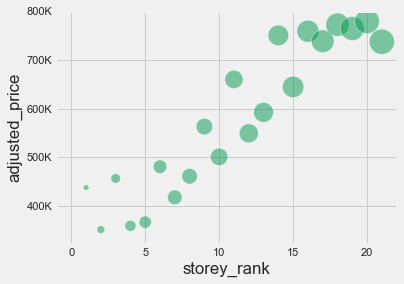

In [ ]:
fig = plt.figure(figsize=(12,4))

# Storey Prices for 2004 to 2013
ax1 = plt.subplot(121)
storey_0413 = hdb_price_df_04_13.groupby('storey_range')['adjusted_price'].median().reset_index().sort_values(by='storey_range')
storey_0413['storey_rank'] = storey_0413['storey_range'].astype('category').cat.codes # label encode storey -> give each storey range a rank
print(storey_0413)
a=sns.scatterplot(x=storey_0413['storey_rank'], y=storey_0413['adjusted_price'], s=storey_0413['storey_rank'].astype('int')*30, color='#00994d', edgecolors='w', alpha=0.5, ax=ax1)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_xticklabels(pd.Series(['']).append(storey_0413.iloc[[0,5,10,15,20,24],0]))
ax1.set_ylim([280000,1100000])
ax1.set_ylabel('Resale Price SGD ($)', size=15)
ax1.set_xlabel('Storey', size=15)
ax1.set_title('All Years', size=15)

'''# Storey Prices for 2014 to 2023
ax2 = plt.subplot(122)
storey_1423 = hdb_price_df_04_13.groupby('storey_range')['adjusted_price'].median().reset_index().sort_values(by='storey_range')
storey_1423['storey_rank'] = storey_1423['storey_range'].astype('category').cat.codes # same as above

# Bubble chart
b=sns.scatterplot(x=storey_1423['storey_rank'], y=storey_1423['adjusted_price'], s=storey_1423['storey_rank'].astype('int')*30, color='#00994d', edgecolors='w', alpha=0.5, ax=ax2)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000]
ax2.set_yticklabels(ylabels); ax2.set_ylabel('')
ax2.set_xticks([0,4,8,12,16])
ax2.set_xticklabels(storey_1423.iloc[[0,4,8,12,16],0])
ax2.set_ylim([280000,1100000]), ax2.set_xlabel('Storey', size=15)
ax2.set_title('2015 to 2019', size=15)'''

plt.show()


## By Floor Area

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_17385/2057991865.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)
/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_17385/2057991865.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


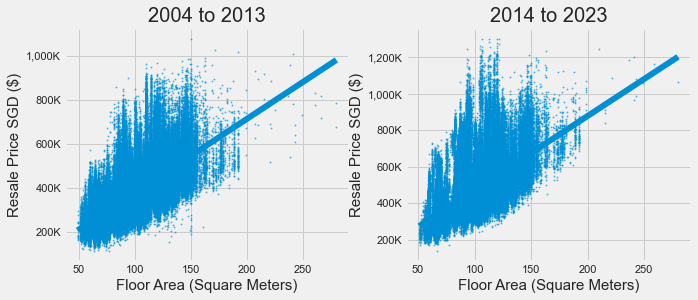

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (10,4))

# 2004 to 2013
p=sns.regplot(x='floor_area_sqm', y='adjusted_price', data=hdb_price_df_04_13, ax=axs[0], scatter_kws={"s": 1, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
p.set_title('2004 to 2013')

# 2014 to 2023
p=sns.regplot(x='floor_area_sqm', y='adjusted_price', data=hdb_price_df_14_23, ax=axs[1], scatter_kws={"s": 1, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
p.set_title('2014 to 2023')

plt.show()

Observation: As floor area (in sqm) increases, resale price generally increases.
majority of HDB transactions have floor area between 50 to close to 200 sqm. 

In [ ]:
# what are those HDBs which have bigger than 200 sqm of floor area
hdb_price_df_04_13[hdb_price_df_04_13['floor_area_sqm'] > 200]['flat_model']
# flat models which have huge floor area are mostly terrace and (premium) maisonette, not suprising

17741                Terrace
17796                Terrace
25933             Maisonette
25960             Maisonette
55343                Terrace
137368               Terrace
137373               Terrace
178545            Maisonette
195397    Premium Maisonette
195402    Premium Maisonette
218644               Terrace
218649               Terrace
218651               Terrace
218652               Terrace
218653               Terrace
220261               Terrace
222301               Terrace
222464               Terrace
222465               Terrace
222923               Terrace
224032             Apartment
224035             Apartment
224267               Terrace
225406               Terrace
225407               Terrace
225412               Terrace
227396               Terrace
227397               Terrace
Name: flat_model, dtype: object

## By Block Number

3 digit system was introduced in the 1970s, with the 1st digit representing a neighbourhood in a town. So for e.g., AMK neighbourhood 1 starts with 101, and AMK neighbourhood 2 starts with 201. So first digit was separated from last 2 digits and plotted separately

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_17385/1127958660.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_17385/1127958660.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels)


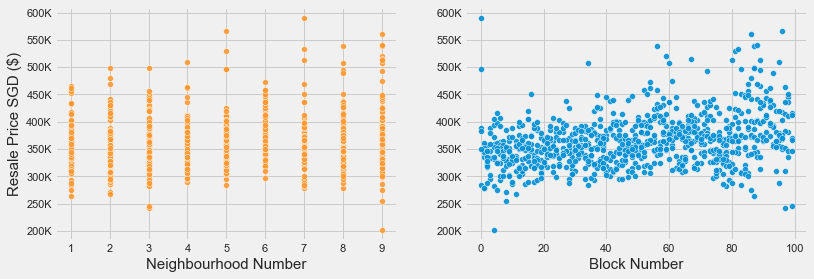

In [ ]:
import re

# 2004 to 2013

# Block Number Prices
get_num = lambda x: int(re.findall("\d+", x)[0])
hdb_price_df_04_13['blocknum'] = hdb_price_df_04_13['block'].apply(get_num) # get only digits from block number
tmp = hdb_price_df_04_13[hdb_price_df_04_13['blocknum'] > 99] # get only blocks that use 3-digit numbering system
tmp = tmp.groupby('blocknum')['adjusted_price'].median().reset_index()

# Scatterplots
fig = plt.figure(figsize=(12,4))

ax1 = plt.subplot(121)
a=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[0])), y=tmp['adjusted_price'], color='#ff9933', edgecolors='w', alpha=0.9)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Neighbourhood Number', size=15)

ax2 = plt.subplot(122)
b=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[1:])), y=tmp['adjusted_price'], edgecolors='w', alpha=0.9)
ax2.set_yticklabels(ylabels)
ax2.set_ylabel('', size=15)
ax2.set_xlabel('Block Number', size=15)

plt.show()

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_17385/178449273.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_17385/178449273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels)


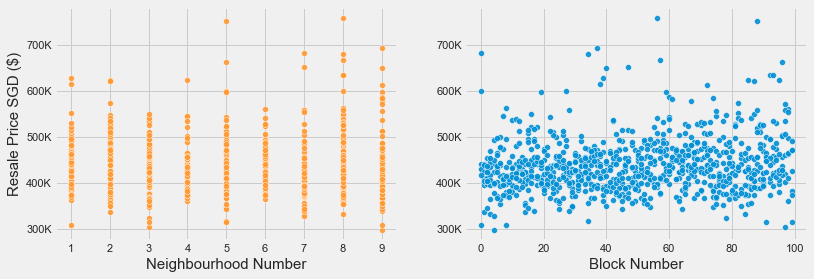

In [ ]:
# Block Number Prices
get_num = lambda x: int(re.findall("\d+", x)[0])
hdb_price_df_14_23['blocknum'] = hdb_price_df_14_23['block'].apply(get_num) # get only digits from block number
tmp = hdb_price_df_14_23[hdb_price_df_14_23['blocknum'] > 99] # get only blocks that use 3-digit numbering system
tmp = tmp.groupby('blocknum')['adjusted_price'].median().reset_index()

# Scatterplots
fig = plt.figure(figsize=(12,4))

ax1 = plt.subplot(121)
a=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[0])), y=tmp['adjusted_price'], color='#ff9933', edgecolors='w', alpha=0.9)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Neighbourhood Number', size=15)

ax2 = plt.subplot(122)
b=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[1:])), y=tmp['adjusted_price'], edgecolors='w', alpha=0.9)
ax2.set_yticklabels(ylabels)
ax2.set_ylabel('', size=15)
ax2.set_xlabel('Block Number', size=15)

plt.show()

block number does not seem to influence HDB resale prices for both time blocks

## By Flat Model box plot

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_17385/884715640.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


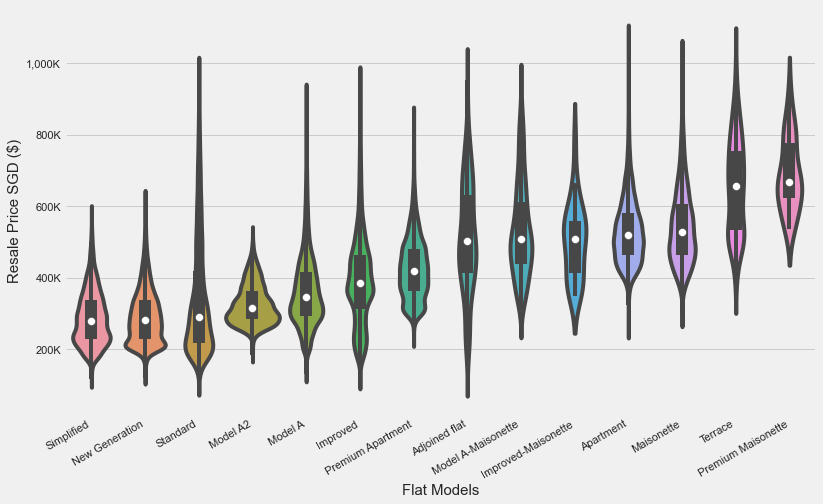

In [ ]:
# Violin plots for price distribution of each flat model

fig = plt.figure(figsize=(12,7))
p=sns.violinplot(x='flat_model', y='adjusted_price', data=hdb_price_df_04_13, width=1,
                order=hdb_price_df_04_13.groupby('flat_model')['adjusted_price'].median().sort_values().reset_index()['flat_model'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right')
p.set_xlabel('Flat Models', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

## By Lease Commence Date

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_17385/4225818156.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels)
/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_17385/4225818156.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xlabels)


Text(0.5, 1.0, 'Resale Price By Lease Commence Year (2014 to 2023)')

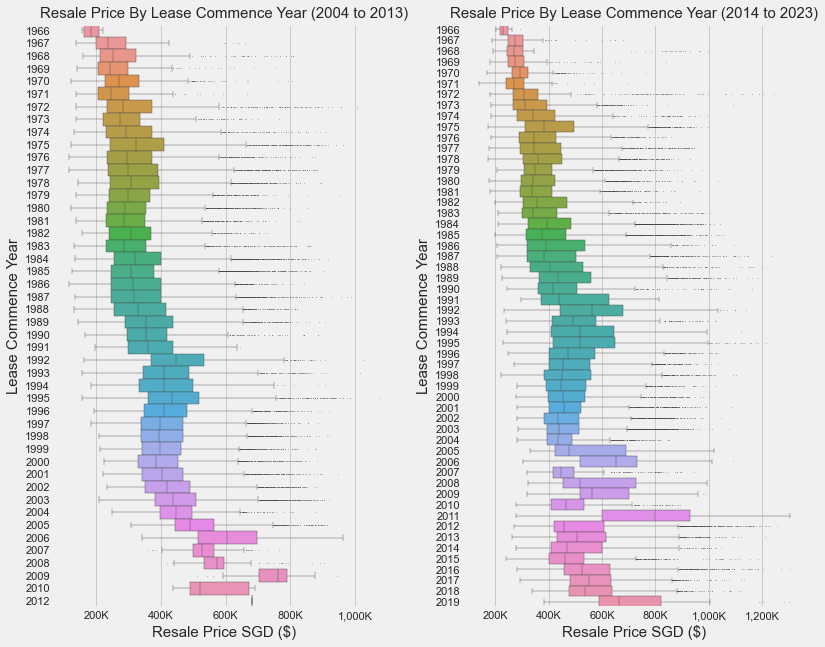

In [ ]:
# Boxplot for each year of lease commence date
fig = plt.figure(figsize=(12,10))

# 2004 to 2013
ax1= plt.subplot(121)
a=sns.boxplot(y='lease_commence_date', x='adjusted_price', data=hdb_price_df_04_13, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
ax1.set_xlabel('Resale Price SGD ($)', size=15)
ax1.set_ylabel('Lease Commence Year', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_xticks()/1000]
ax1.set_xticklabels(xlabels)
ax1.set_title('Resale Price By Lease Commence Year (2004 to 2013)', size=15)

# 2014 to 2023
ax2 = plt.subplot(122)
b=sns.boxplot(y='lease_commence_date', x='adjusted_price', data=hdb_price_df_14_23, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
ax2.set_xlabel('Resale Price SGD ($)', size=15)
ax2.set_ylabel('Lease Commence Year', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in b.get_xticks()/1000]
ax2.set_xticklabels(xlabels)
ax2.set_title('Resale Price By Lease Commence Year (2014 to 2023)', size=15)


## By Remaining Lease scatter

In [ ]:
hdb_prices_df['remaining_lease'].unique()

array([ 85.        ,  86.        ,  87.        ,  88.        ,
        89.        ,  90.        ,  91.        ,  92.        ,
        93.        ,  71.        ,  72.        ,  73.        ,
        74.        ,  75.        ,  76.        ,  77.        ,
        78.        ,  79.        ,  80.        ,  81.        ,
        82.        ,  83.        ,  66.        ,  67.        ,
        68.        ,  69.        ,  70.        ,  94.        ,
        95.        ,  96.        ,  84.        ,  65.        ,
        55.        ,  56.        ,  57.        ,  58.        ,
        59.        ,  60.        ,  61.        ,  62.        ,
        64.        ,  63.        ,  97.        ,  98.        ,
        99.        , 100.        ,  54.        , 101.        ,
        74.33333333,  74.58333333,  74.66666667,  75.08333333,
        75.58333333,  76.5       ,  76.66666667,  76.75      ,
        79.08333333,  80.16666667,  59.41666667,  60.16666667,
        60.33333333,  60.83333333,  60.91666667,  61.08

ValueError: The number of FixedLocator locations (46), usually from a call to set_ticks, does not match the number of ticklabels (8).

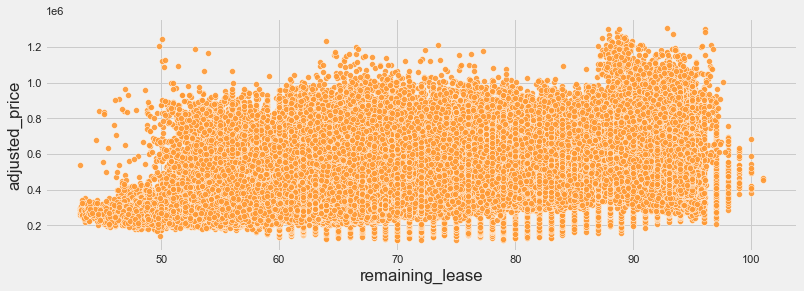

In [ ]:
# scatterplot for remaining lease  of HDB
# use hdb_prices_df - combination of all data from 2004 to 2023

fig = plt.figure(figsize=(12,4))

a=sns.scatterplot(x=hdb_prices_df['remaining_lease'], y=hdb_prices_df['adjusted_price'], color='#ff9933', edgecolors='w', alpha=0.9)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Neighbourhood Number', size=15)


## By Number of Amenities (MRT, Malls & Good Schools) within 1 km

#### 2004 to 2013

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_3228/1762143271.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)


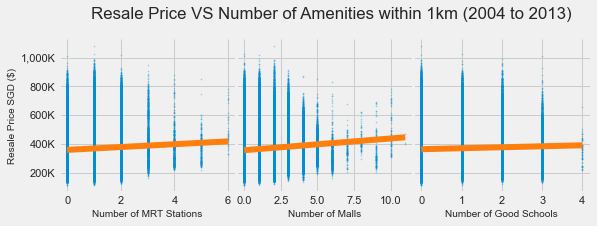

In [ ]:
p=sns.pairplot(hdb_price_df_04_13, x_vars=['mrt_count_within_1km', 'mall_count_within_1km','good_sch_count_within_1km'], y_vars=['adjusted_price'], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=0.5,alpha=0.3), line_kws=dict(color='#ff7f0e')))
axes=p.axes

ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Number of MRT Stations', size=10)
axes[0,1].set_xlabel('Number of Malls', size=10)
axes[0,2].set_xlabel('Number of Good Schools', size=10)

plt.suptitle('Resale Price VS Number of Amenities within 1km (2004 to 2013)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

#### 2014 to 2023

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_3228/150124977.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)


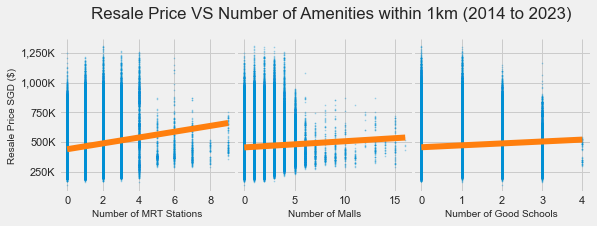

In [ ]:
p=sns.pairplot(hdb_price_df_14_23, x_vars=['mrt_count_within_1km', 'mall_count_within_1km','good_sch_count_within_1km'], y_vars=['adjusted_price'], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=0.5,alpha=0.3), line_kws=dict(color='#ff7f0e')))
axes=p.axes

ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Number of MRT Stations', size=10)
axes[0,1].set_xlabel('Number of Malls', size=10)
axes[0,2].set_xlabel('Number of Good Schools', size=10)

plt.suptitle('Resale Price VS Number of Amenities within 1km (2014 to 2023)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

For Number of MRT Stations within 1km: 
- Strong and postiive correlation between Number of MRT stations within 1km and the respective HDB resale prices.

For Number of Malls within 1km:
- Weak and positive correlation 

For Number of Good Schools within 1km:
- Very weak (little to no) correlation 

## By Shortest Distance to MRT (in km)

In [ ]:
hdb_price_df_04_13['shortest_dist_mrt']

0         0.754215
1         0.754215
2         0.754215
3         0.754215
4         0.754215
            ...   
227566    0.888593
227567    0.888593
227568    0.888593
227569    0.888593
227570    0.888593
Name: shortest_dist_mrt, Length: 225010, dtype: float64

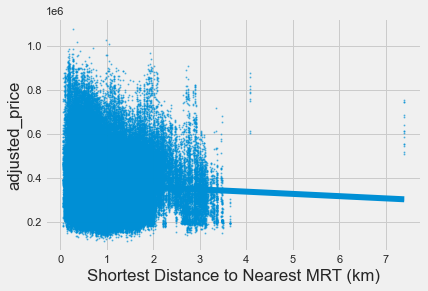

In [ ]:
# 2004 to 2013
sns.regplot(x='shortest_dist_mrt', y='adjusted_price', data=hdb_price_df_04_13, scatter_kws={"s": 1, 'alpha':0.5})
plt.xlabel('Shortest Distance to Nearest MRT (km)')
plt.ylabel('Resale Price ($)')
plt.title('')
plt.show()


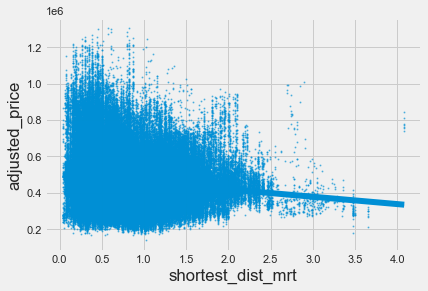

In [ ]:
# 2014 to 2023
sns.regplot(x='shortest_dist_mrt', y='adjusted_price', data=hdb_price_df_14_23, scatter_kws={"s": 1, 'alpha':0.5})
plt.show()

general trend is that the further away the HDB is from the nearest MRT, it is associated with a decrease in its resale price 

## By Shortest Distance Mrt Name

## By Shortest Mall Distance

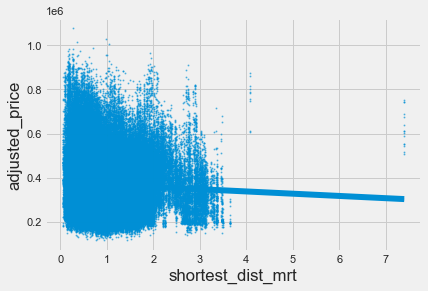

In [ ]:
# 2004 to 2013
sns.regplot(x='shortest_dist_mrt', y='adjusted_price', data=hdb_price_df_04_13, scatter_kws={"s": 1, 'alpha':0.5})
plt.show()

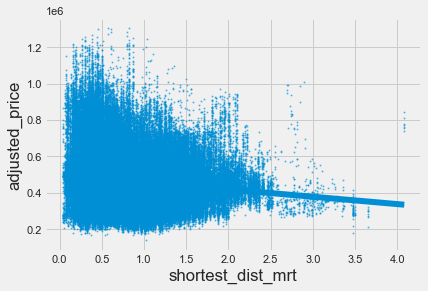

In [ ]:
# 2014 to 2023
sns.regplot(x='shortest_dist_mrt', y='adjusted_price', data=hdb_price_df_14_23, scatter_kws={"s": 1, 'alpha':0.5})
plt.show()

## By Shortest Mall Distance Name

## By Nearest School & Name

## By Good Schools Score

In [ ]:
hdb_prices_df['good_sch_score'].unique()

array([3, 4, 1, 0, 2])

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_3228/3581866469.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


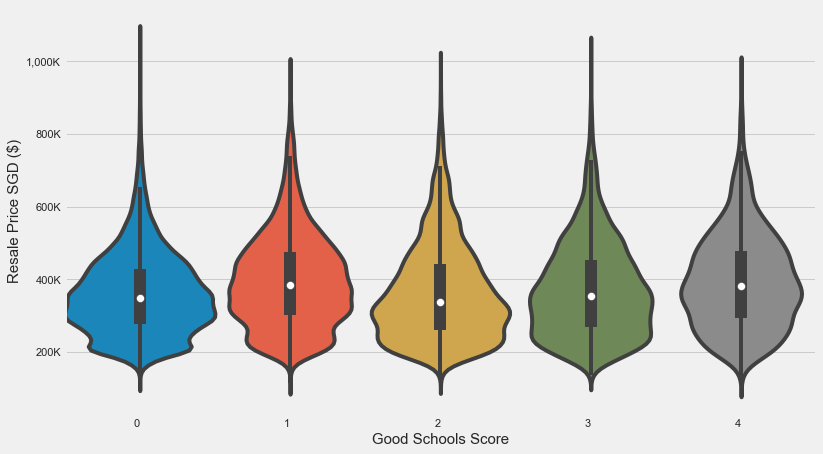

In [ ]:
# 2004 to 2013
fig = plt.figure(figsize=(12,7))
p=sns.violinplot(x='good_sch_score', y='adjusted_price', data=hdb_price_df_04_13, width=1,
                order=hdb_price_df_04_13.groupby('good_sch_score')['adjusted_price'].median().reset_index()['good_sch_score'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=0, ha='right')
p.set_xlabel('Good Schools Score', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_3228/3235359343.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


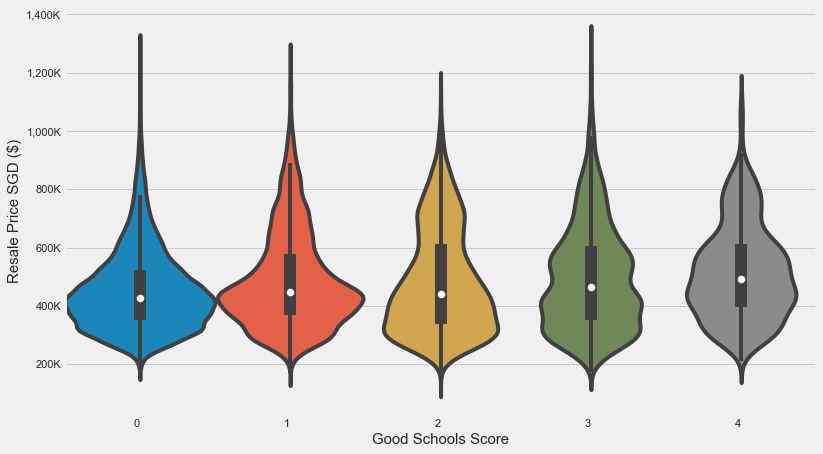

In [ ]:
# 2014 to 2023
fig = plt.figure(figsize=(12,7))
p=sns.violinplot(x='good_sch_score', y='adjusted_price', data=hdb_price_df_14_23, width=1,
                order=hdb_price_df_04_13.groupby('good_sch_score')['adjusted_price'].median().reset_index()['good_sch_score'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=0, ha='right')
p.set_xlabel('Good Schools Score', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

the scoring of good schools near to HDB does not seem to be correlated with its resale price.

## By Distance to CBD 

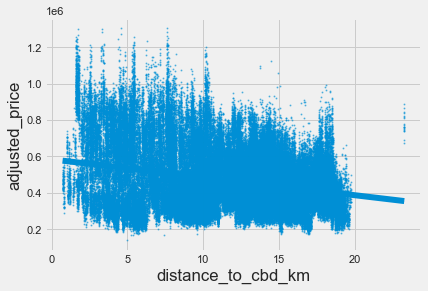

In [ ]:
hdb_prices_df['distance_to_cbd_km']
# 2014 to 2023
sns.regplot(x='distance_to_cbd_km', y='adjusted_price', data=hdb_price_df_14_23, scatter_kws={"s": 1, 'alpha':0.5})
plt.show()

## By Maturity

In [ ]:
hdb_prices_df['matured'].unique()

array([1, 0])

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_3228/3810849738.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


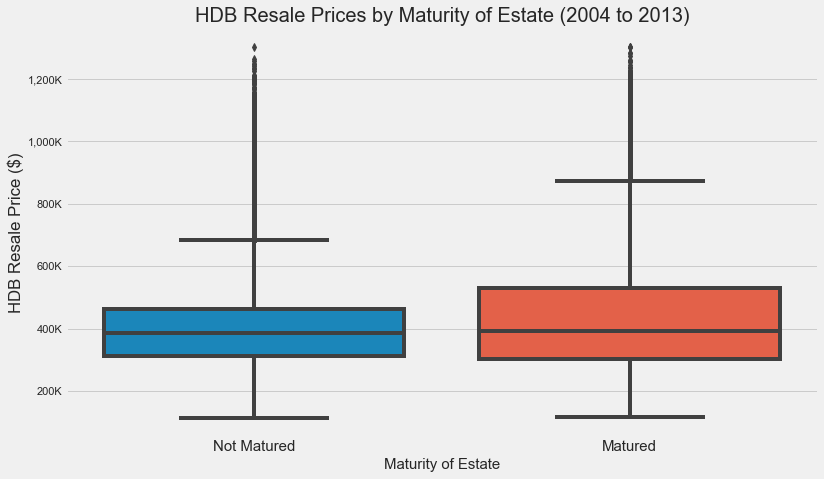

In [ ]:
fig=plt.figure(figsize=(12,7))
p = sns.boxplot(x='matured', y='adjusted_price', data = hdb_price_df_04_13)
p.set_xticklabels(['Not Matured', 'Matured'], size = 15)
p.set_xlabel('Maturity of Estate', size=15)
p.set_title('HDB Resale Prices by Maturity of Estate (2004 to 2013)', size=20)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('HDB Resale Price ($)')
# sns.despine(left=True)
plt.show()

/var/folders/dr/gs9wbbgs2zlcfyqybn5vvrw40000gn/T/ipykernel_3228/695355345.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


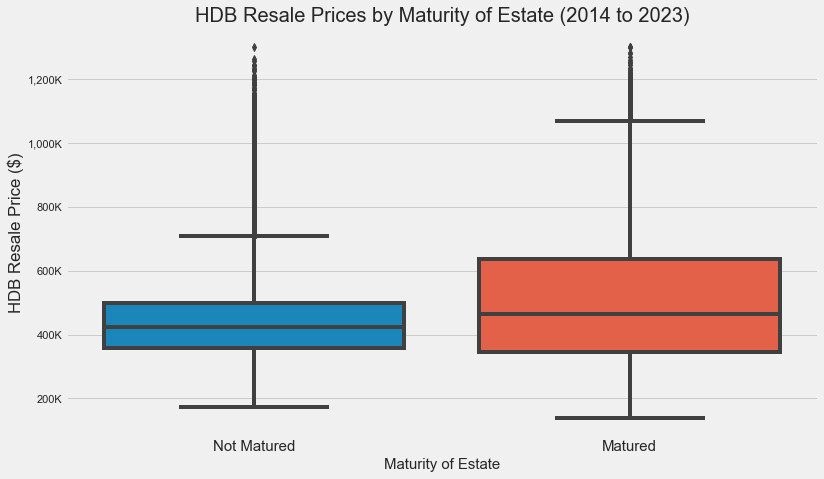

In [ ]:
fig=plt.figure(figsize=(12,7))
p = sns.boxplot(x='matured', y='adjusted_price', data = hdb_price_df_14_23)
p.set_xticklabels(['Not Matured', 'Matured'], size = 15)
p.set_xlabel('Maturity of Estate', size=15)
p.set_title('HDB Resale Prices by Maturity of Estate (2014 to 2023)', size=20)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('HDB Resale Price ($)')
# sns.despine(left=True)
plt.show()

Not much visible association between maturity of estates and resale prices.